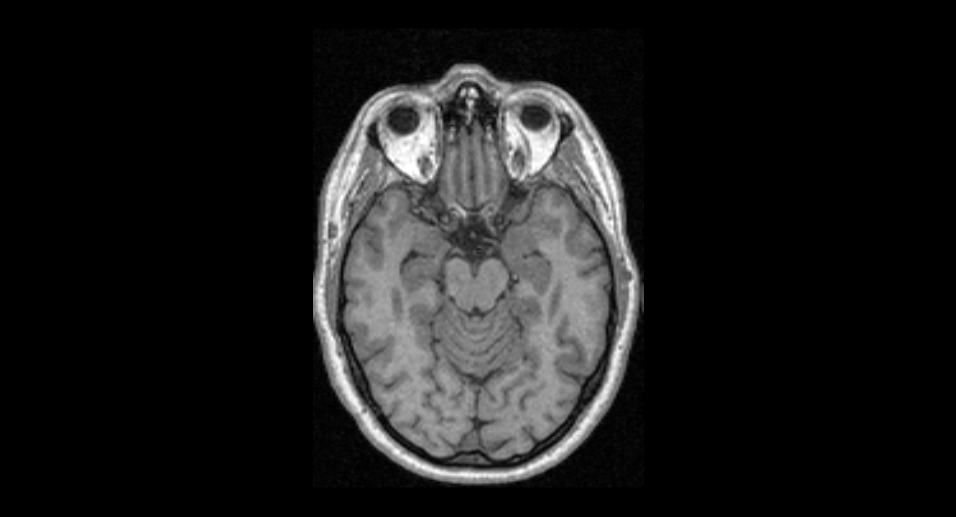

In [41]:
import JupyterNotebooksLib as slicernb
import slicer
import SampleData

# Limpia escena
slicer.mrmlScene.Clear()

# Carga la base de datos de imagenes de ejemplo
data = SampleData.SampleDataLogic()

# Descarga el dataset de la base de datos

volume = data.downloadMRHead()
#volume = data.downloadCTChest()
#volume = data.downloadCTACardio()

#Display
slicernb.ViewDisplay()



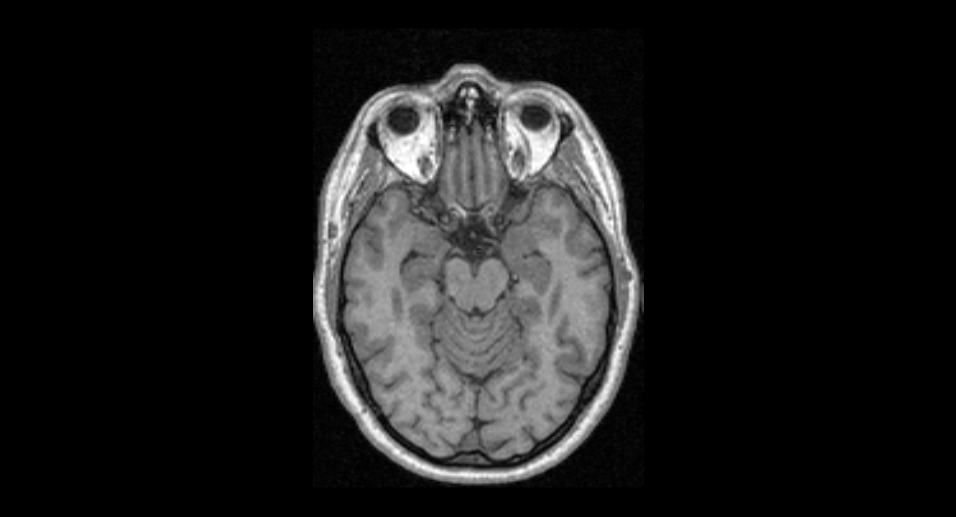

In [42]:
# 1 sola vista 
slicernb.ViewDisplay("OneUpRedSlice") # Otras opciones: FourUp,OneUp3D,OneUpGreenSlice

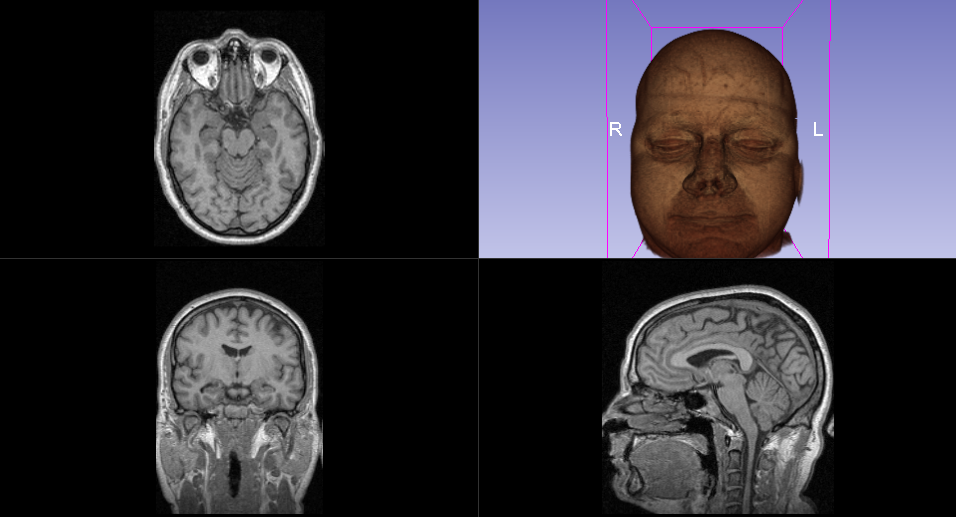

In [43]:
# Volume rendering
slicernb.showVolumeRendering(volume)
slicernb.ViewDisplay("FourUp")

In [44]:
# Slice interativo
from ipywidgets import interact
@interact(position=(0,100)) # Scroll en 1 de las vistas
def update(position=50):
    return slicernb.ViewSliceDisplay('Red', positionPercent=position)

interactive(children=(IntSlider(value=50, description='position'), Output()), _dom_classes=('widget-interact',…

In [45]:
# Cropping
displayNode = slicer.modules.volumerendering.logic().GetFirstVolumeRenderingDisplayNode(volume)
displayNode.SetCroppingEnabled(True)
slicer.modules.volumerendering.logic().CreateROINode(displayNode)
roiNode = displayNode.GetROINode()

# 3D view display
slicernb.reset3DView()
roiNode.GetDisplayNode().SetVisibility(False)  # hide the ROI box
from ipywidgets import interact
@interact(roll=(-90.0,90.0,5), pitch=(-90.0,90.0,5), yaw=(-180.0,180.0,5), cropx=(0,140,5), cropy=(0,240,5), cropz=(0,160,5))
def update(roll=0, pitch=-10, yaw=30, cropx=140, cropy=240, cropz=160):
    #roiNode.SetRadiusXYZ([cropx, cropy, cropz])
    roiNode.SetSizeWorld([cropx, cropy, cropz])
    return slicernb.View3DDisplay(0, orientation=[roll, pitch, yaw])

interactive(children=(FloatSlider(value=0.0, description='roll', max=90.0, min=-90.0, step=5.0), FloatSlider(v…

In [31]:
from ipywidgets import HBox
slicernb.ViewSliceWidget('Red')
display(HBox([slicernb.ViewSliceWidget('Red'), slicernb.ViewSliceWidget('Yellow'), slicernb.ViewSliceWidget('Green')]))

In [32]:
# 3D widget
display(HBox([slicernb.ViewSliceBaseWidget('Red', width="40%"), slicernb.View3DWidget(0, width="40%")]))

In [46]:
slicer.modules.jupyterkernel.setPollIntervalSec(0.001)
# 3D view
slicernb.AppWindow.setWindowSize(scale=0.8)
live3d = slicernb.ViewInteractiveWidget('1')
live3d.trackMouseMove = True
display(live3d)

ViewInteractiveWidget(height=182, width=340)